In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2022-01-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2022_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-01-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7416,해운대구,13425,해운대구,6009,81.03%,"9,672"
1,2022-01-20,간장,오복왕표 0.9ℓ 1병,6829,해운대구,7250,해운대구,421,6.16%,"7,020"
2,2022-01-20,갈치,60cm정도 500g 1마리(냉동),11148,해운대구,13692,해운대구,2544,22.82%,"12,724"
3,2022-01-20,달걀,오경슈퍼란60g정도 10개,3450,해운대구,4980,해운대구,1530,44.35%,"4,143"
4,2022-01-20,닭고기,육계 1.0㎏,5980,해운대구,8223,해운대구,2243,37.51%,"7,028"
5,2022-01-20,대파,1.0㎏,2643,해운대구,2990,해운대구,347,13.13%,"2,851"
6,2022-01-20,돼지고기,삼겹살 500g,9900,해운대구,18450,해운대구,8550,86.36%,"13,083"
7,2022-01-20,두부,500g 판두부(국산포장두부 420g) 1모,5194,해운대구,5620,해운대구,426,8.2%,"5,336"
8,2022-01-20,라면,신라면 120g 1봉지,736,해운대구,736,해운대구,0,0.0%,736
9,2022-01-20,맥주,하이트 500㎖ 1병,1410,해운대구,1650,해운대구,240,17.02%,"1,500"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2022-04-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2022_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-04-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6583,해운대구,8925,해운대구,2342,35.58%,"7,407"
1,2022-04-21,간장,오복왕표 0.9ℓ 1병,6829,해운대구,7780,해운대구,951,13.93%,"7,186"
2,2022-04-21,갈치,60cm정도 500g 1마리(냉동),7611,해운대구,18000,해운대구,10389,136.5%,"12,386"
3,2022-04-21,고등어,30㎝정도 500g 1마리,6818,해운대구,11588,해운대구,4770,69.96%,"8,823"
4,2022-04-21,달걀,오경슈퍼란60g정도 10개,3690,해운대구,3980,해운대구,290,7.86%,"3,840"
5,2022-04-21,닭고기,육계 1.0㎏,6900,해운대구,10612,해운대구,3712,53.8%,"8,497"
6,2022-04-21,대파,1.0㎏,2265,해운대구,3040,해운대구,775,34.22%,"2,765"
7,2022-04-21,돼지고기,삼겹살 500g,11250,해운대구,14950,해운대구,3700,32.89%,"13,317"
8,2022-04-21,두부,500g 판두부(국산포장두부 420g) 1모,5194,해운대구,5620,해운대구,426,8.2%,"5,336"
9,2022-04-21,라면,신라면 120g 1봉지,736,해운대구,736,해운대구,0,0.0%,736


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2022-07-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2022_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-07-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7416,해운대구,14850,해운대구,7434,100.24%,"10,397"
1,2022-07-21,간장,오복왕표 0.9ℓ 1병,6146,해운대구,7000,해운대구,854,13.9%,"6,495"
2,2022-07-21,갈치,60cm정도 500g 1마리(냉동),10429,해운대구,20000,해운대구,9571,91.77%,"16,030"
3,2022-07-21,고등어,30㎝정도 500g 1마리,4328,해운대구,7258,해운대구,2930,67.7%,"5,385"
4,2022-07-21,달걀,오경슈퍼란60g정도 10개,3690,해운대구,4000,해운대구,310,8.4%,"3,890"
5,2022-07-21,닭고기,육계 1.0㎏,5980,해운대구,10612,해운대구,4632,77.46%,"8,524"
6,2022-07-21,대파,1.0㎏,2260,해운대구,3790,해운대구,1530,67.7%,"2,989"
7,2022-07-21,돼지고기,삼겹살 500g,12250,해운대구,23950,해운대구,11700,95.51%,"16,533"
8,2022-07-21,두부,500g 판두부(국산포장두부 420g) 1모,4398,해운대구,5620,해운대구,1222,27.79%,"5,071"
9,2022-07-21,라면,신라면 120g 1봉지,736,해운대구,736,해운대구,0,0.0%,736


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2022-10-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2022_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-10-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8250,해운대구,14850,해운대구,6600,80.0%,"10,675"
1,2022-10-20,간장,오복왕표 0.9ℓ 1병,6146,해운대구,7000,해운대구,854,13.9%,"6,495"
2,2022-10-20,갈치,60cm정도 500g 1마리(냉동),14594,해운대구,19565,해운대구,4971,34.06%,"17,509"
3,2022-10-20,고등어,30㎝정도 500g 1마리,4208,해운대구,6238,해운대구,2030,48.24%,"5,073"
4,2022-10-20,달걀,오경슈퍼란60g정도 10개,3690,해운대구,3980,해운대구,290,7.86%,"3,823"
5,2022-10-20,대파,1.0㎏,3160,해운대구,4544,해운대구,1384,43.8%,"3,791"
6,2022-10-20,돼지고기,삼겹살 500g,11750,해운대구,19950,해운대구,8200,69.79%,"15,200"
7,2022-10-20,두부,500g 판두부(국산포장두부 420g) 1모,4962,해운대구,5620,해운대구,658,13.26%,"5,259"
8,2022-10-20,라면,신라면 120g 1봉지,820,해운대구,820,해운대구,0,0.0%,820
9,2022-10-20,맥주,하이트 500㎖ 1병,1550,해운대구,1810,해운대구,260,16.77%,"1,647"


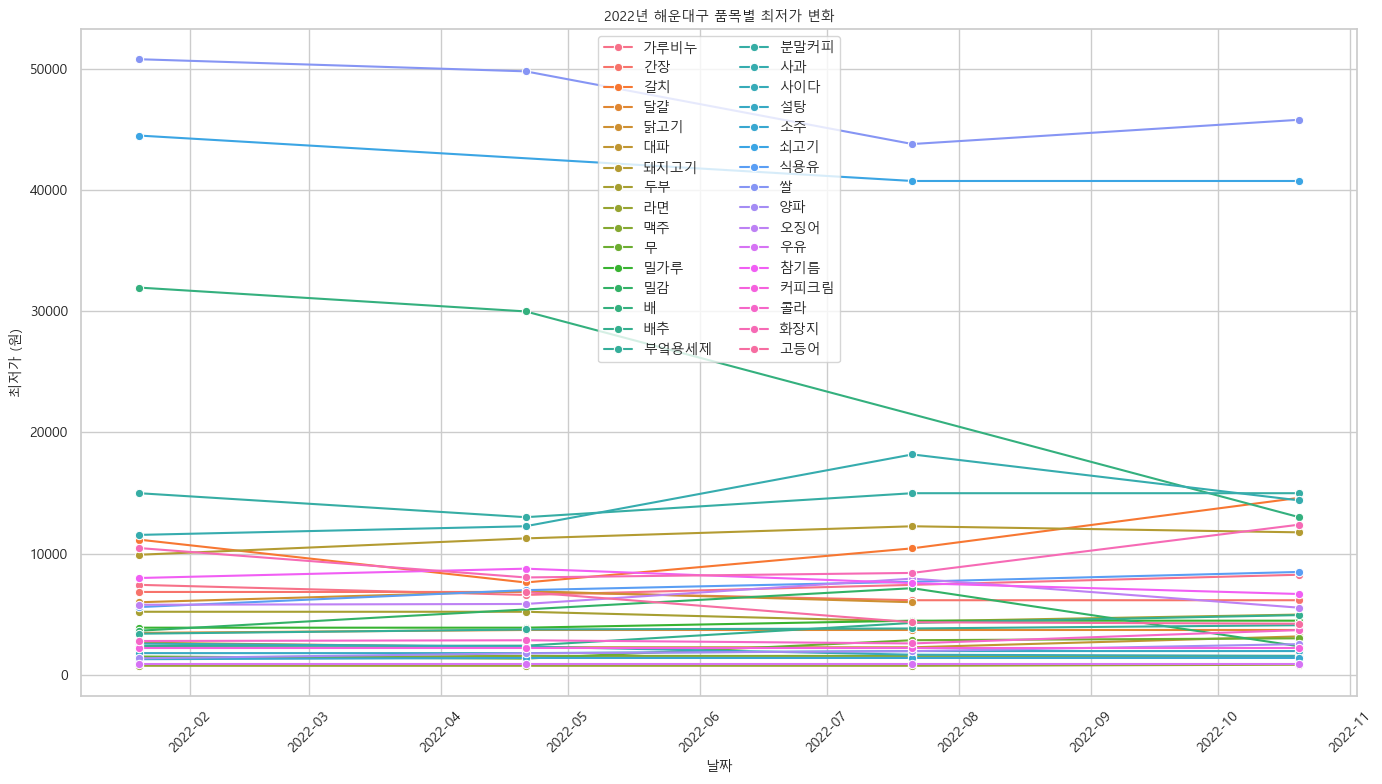

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2022_1q.csv")
q2 = pd.read_csv("해운대구2022_2q.csv")
q3 = pd.read_csv("해운대구2022_3q.csv")
q4 = pd.read_csv("해운대구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2022_min.csv", index=False, encoding="utf-8-sig")

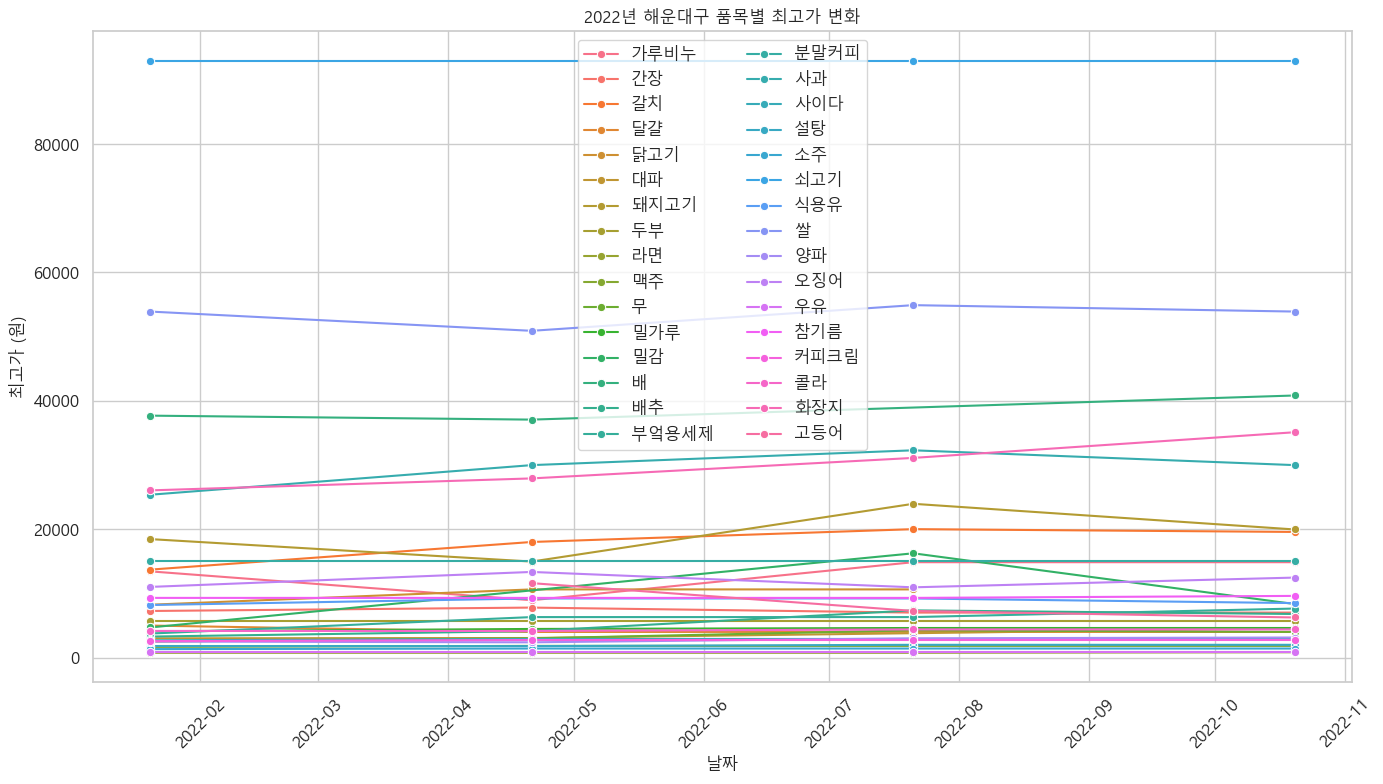

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2022_1q.csv")
q2 = pd.read_csv("해운대구2022_2q.csv")
q3 = pd.read_csv("해운대구2022_3q.csv")
q4 = pd.read_csv("해운대구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2022_max.csv", index=False, encoding="utf-8-sig")